<a href="https://colab.research.google.com/github/meet108/Datascience_Project/blob/main/credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part-1: Data Exploration and Pre-processing**

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) load the given dataset

In [67]:
data=pd.read_excel('/content/drive/MyDrive/Datascience_projects/ML Project - KNN Loan Applicant Credit Risk Analysis U 16955473070.xlsx')
data.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


# 2) Check for the null values

In [68]:
data.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

# 3) Get basic information from data

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


# 4) Describe the dataset

In [70]:
data.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


# 5) Display scatterplot between age & Total work Experience

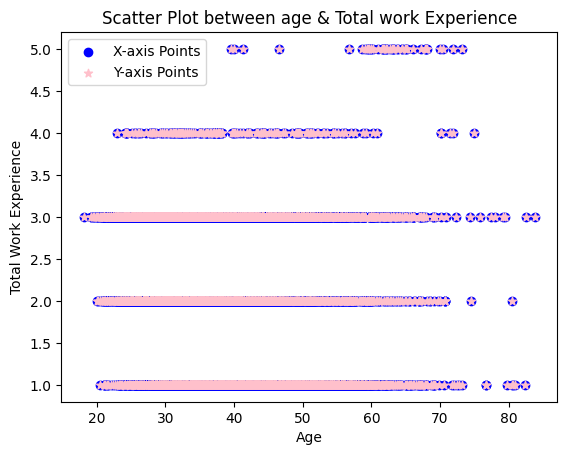

In [71]:
plt.scatter(data['Age'], data['Total Work Experience'], color='blue', marker='o', label='X-axis Points')
plt.scatter(data['Age'], data['Total Work Experience'], color='pink', marker='*', label='Y-axis Points')
plt.xlabel('Age')
plt.ylabel('Total Work Experience')
plt.title('Scatter Plot between age & Total work Experience')
plt.legend()
plt.show()

# 6) Display box plot for age

In [72]:
data['Age'].unique()

array([40.5 , 41.25, 39.5 , ..., 57.2 , 65.11, 19.2 ])

In [73]:
data['Age'].value_counts()

34.00    43
35.00    41
41.00    37
33.00    37
32.50    37
         ..
60.20     1
48.11     1
18.10     1
59.80     1
19.20     1
Name: Age, Length: 1024, dtype: int64

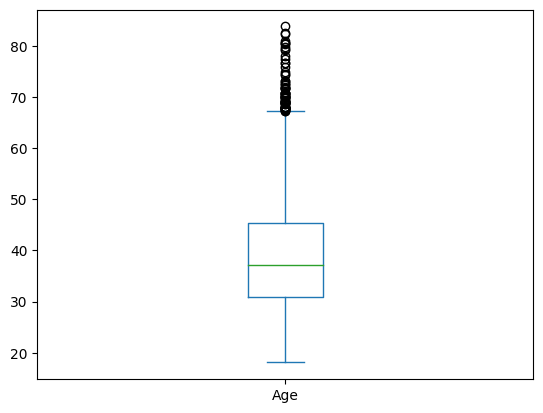

In [104]:
data['Age'].plot(kind='box')
plt.show()

# 7) Display box plot for Cibil score

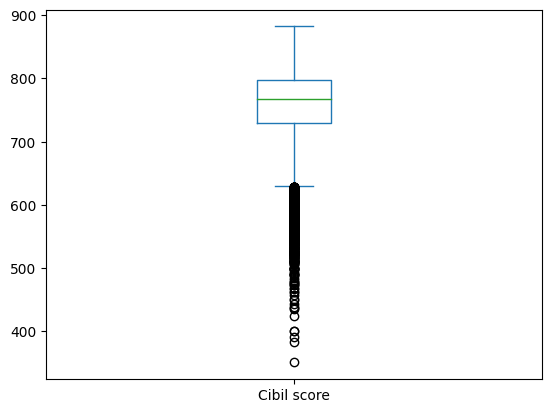

In [103]:
data['Cibil score'].plot(kind='box')
plt.show()

# 8) Create target and features data where target is Total bounces past 12 months

In [76]:
y = data['Total bounces past12months']

In [77]:
X = data[['Age','Total Work Experience','Number of years in city', 'Cost to Request Ratio', 'Cibil score', 'Overdrafts past12months']]

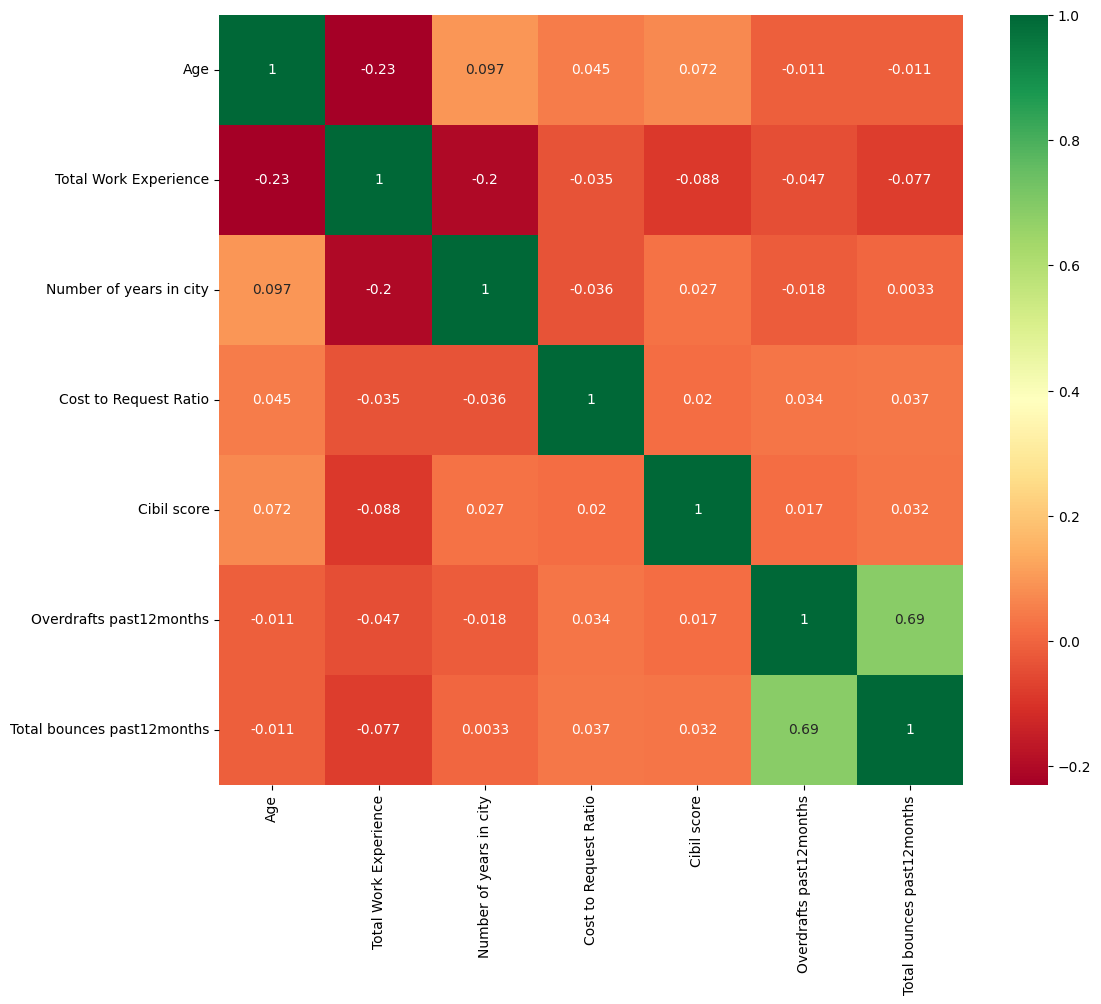

In [78]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

In [79]:
data.corr()['Total bounces past12months']

Age                          -0.011051
Total Work Experience        -0.076853
Number of years in city       0.003318
Cost to Request Ratio         0.036678
Cibil score                   0.032259
Overdrafts past12months       0.687339
Total bounces past12months    1.000000
Name: Total bounces past12months, dtype: float64

# **Part-2: Working with Model**

# 1) Split data into training and testing sets

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [81]:
X_train

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months
7237,25.42,3,5,0.230700,724,0
5439,28.25,2,3,0.779775,742,0
3803,23.25,3,3,0.396535,789,0
3752,47.70,1,4,1.000000,825,0
5331,33.08,3,4,0.785677,821,0
...,...,...,...,...,...,...
4829,31.58,2,5,0.564944,773,0
7291,38.58,3,2,0.901509,782,0
1344,33.42,2,4,0.813480,700,2
7293,32.70,3,2,0.770329,720,0


In [82]:
X_test

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months
3066,57.08,2,5,0.654101,820,0
8298,49.92,1,6,0.599619,726,0
2429,46.42,1,5,1.200000,804,0
873,42.60,2,4,0.899555,856,0
7123,29.50,4,4,0.953010,782,0
...,...,...,...,...,...,...
1370,38.50,2,4,0.636705,807,0
6511,43.40,1,4,0.599792,821,0
6670,62.20,3,5,1.092542,823,0
4224,36.10,3,5,0.799200,559,0


In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [84]:
X_train

array([[-1.31418599,  0.96574041,  0.56878284, -1.16266106, -0.42543356,
        -0.35741493],
       [-1.03760981, -0.14938603, -1.00634178, -0.10225049, -0.15848289,
        -0.35741493],
       [-1.5262603 ,  0.96574041, -1.00634178, -0.84239004,  0.53855495,
        -0.35741493],
       ...,
       [-0.53234519, -0.14938603, -0.21877947, -0.03715598, -0.78136777,
         1.8427201 ],
       [-0.60271087,  0.96574041, -1.79390409, -0.12049303, -0.48475592,
        -0.35741493],
       [-0.80794407,  0.96574041,  1.35634515,  0.02618299, -1.96781516,
        -0.35741493]])

In [85]:
y_train

7237    0
5439    0
3803    0
3752    0
5331    0
       ..
4829    0
7291    0
1344    4
7293    0
1289    0
Name: Total bounces past12months, Length: 7196, dtype: int64

In [86]:
y_test

3066    7
8298    0
2429    1
873     0
7123    0
       ..
1370    0
6511    0
6670    2
4224    0
5012    0
Name: Total bounces past12months, Length: 1799, dtype: int64

In [87]:
X_test

array([[ 1.77994895, -0.14938603,  0.56878284, -0.3449613 ,  0.99830331,
        -0.35741493],
       [ 1.08020144, -1.26451247,  1.35634515, -0.45018041, -0.39577237,
        -0.35741493],
       [ 0.7381461 , -1.26451247,  0.56878284,  0.70931677,  0.76101384,
        -0.35741493],
       ...,
       [ 2.28032706,  0.96574041,  0.56878284,  0.50178708,  1.04279509,
        -0.35741493],
       [-0.27042853,  0.96574041,  0.56878284, -0.06473633, -2.8724813 ,
        -0.35741493],
       [-0.38575005, -0.14938603, -1.00634178,  0.030628  ,  0.33092666,
        -0.35741493]])

In [88]:
cols = X.columns

In [89]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [90]:
X_train

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months
0,-1.314186,0.965740,0.568783,-1.162661,-0.425434,-0.357415
1,-1.037610,-0.149386,-1.006342,-0.102250,-0.158483,-0.357415
2,-1.526260,0.965740,-1.006342,-0.842390,0.538555,-0.357415
3,0.863241,-1.264512,-0.218779,0.323063,1.072456,-0.357415
4,-0.565573,0.965740,-0.218779,-0.090851,1.013134,-0.357415
...,...,...,...,...,...,...
7191,-0.712169,-0.149386,0.568783,-0.517146,0.301265,-0.357415
7192,-0.028058,0.965740,-1.793904,0.132850,0.434741,-0.357415
7193,-0.532345,-0.149386,-0.218779,-0.037156,-0.781368,1.842720
7194,-0.602711,0.965740,-1.793904,-0.120493,-0.484756,-0.357415


In [91]:
X_test

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months
0,1.779949,-0.149386,0.568783,-0.344961,0.998303,-0.357415
1,1.080201,-1.264512,1.356345,-0.450180,-0.395772,-0.357415
2,0.738146,-1.264512,0.568783,0.709317,0.761014,-0.357415
3,0.364817,-0.149386,-0.218779,0.129077,1.532205,-0.357415
4,-0.915447,2.080867,-0.218779,0.232313,0.434741,-0.357415
...,...,...,...,...,...,...
1794,-0.035876,-0.149386,-0.218779,-0.378556,0.805506,-0.357415
1795,0.443001,-1.264512,-0.218779,-0.449845,1.013134,-0.357415
1796,2.280327,0.965740,0.568783,0.501787,1.042795,-0.357415
1797,-0.270429,0.965740,0.568783,-0.064736,-2.872481,-0.357415


In [92]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((7196, 6), (1799, 6), (7196,), (1799,))

In [93]:
from sklearn.neighbors import KNeighborsClassifier

# 2) Create a KNN classifier between Features and target data

In [94]:
model = KNeighborsClassifier(14)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

# 4) Display the training score

In [106]:
model.score(X_train,y_train)*100

70.96998332406893

# 3) Display the test score

In [107]:
model.score(X_test,y_test)*100

68.8160088938299

In [112]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [116]:
confusion_matrix(y_test,y_pred)

array([[1144,    6,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [ 190,   73,    9,    4,    4,    0,    0,    0,    1,    0,    0,
           0,    0],
       [  67,   29,    5,    6,    1,    0,    0,    0,    1,    0,    0,
           0,    0],
       [  32,   21,    4,    4,    5,    0,    0,    2,    1,    0,    0,
           0,    0],
       [  14,   15,    4,    2,    3,    1,    0,    0,    1,    1,    2,
           0,    0],
       [  10,    8,    2,    4,    0,    0,    1,    2,    0,    1,    0,
           0,    0],
       [  10,    7,    3,    3,    1,    1,    1,    2,    1,    0,    0,
           1,    0],
       [   8,    7,    0,    0,    1,    2,    0,    0,    1,    0,    0,
           0,    0],
       [   2,    7,    1,    0,    2,    3,    0,    0,    4,    1,    0,
           0,    0],
       [   0,    2,    2,    0,    2,    1,    0,    1,    3,    2,    0,
           3,    0],
       [   2,    7,    1,    0,    0,    1,    0, 

# 5) Print the accuracy score

In [115]:
accuracy_score(y_test,y_pred)*100

68.8160088938299

# 6) Try 1 to 14 k values for classifier


In [101]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    model = KNeighborsClassifier(i)
    model.fit(X_train,y_train)

    train_scores.append(model.score(X_train,y_train))
    test_scores.append(model.score(X_test,y_test))


# 7) Display training and testing score for all the 1 to 14 k values

In [102]:
print("Test_Score:",test_scores)
print("Train_Score",train_scores)

Test_Score: [0.5686492495831017, 0.6609227348526959, 0.6614785992217899, 0.669816564758199, 0.6703724291272929, 0.6748193440800445, 0.67982212340189, 0.6820455808782657, 0.6848249027237354, 0.6781545302946081, 0.6814897165091718, 0.6837131739855475, 0.6859366314619233, 0.688160088938299]
Train_Score [1.0, 0.7887715397443024, 0.7580600333518621, 0.7423568649249583, 0.7334630350194552, 0.7254030016675931, 0.7226236798221234, 0.7206781545302946, 0.7180377987770984, 0.7159533073929961, 0.7137298499166204, 0.7140077821011673, 0.7119232907170651, 0.7096998332406893]
